# XOR Deep Learning - Tensorflow 2.x


In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report

# Training Data Set
x_data = np.array([[0,0], [0,1], [1,0], [1,1]], dtype=np.float32)
t_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

# keras model
model = Sequential()

# keras layers
model.add(Flatten(input_shape=(2,))) # input: A, B
# 숫자: 출력 개수
model.add(Dense(10, activation='sigmoid')) # hidden
model.add(Dense(6, activation='sigmoid')) # hidden
model.add(Dense(1, activation='sigmoid')) # output

# compile
# binary classification
model.compile(optimizer=SGD(learning_rate=1e-2), loss='binary_crossentropy', metrics=['accuracy']) 

# learning
history = model.fit(x_data, t_data, epochs=30000, verbose=0)

# accuracy
predict_val = model.predict(x_data) # 확률값
result = tf.cast(predict_val >= 0.5, dtype=tf.float32).numpy() # 텐서 노드를 ndarray로 빼줌
print(classification_report(t_data.ravel(), result.ravel()))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



## 학습이 제대로 진행되지 않았을 경우
* 학습 결과에 대한 정보가 들어있는 history 객체를 확인
* learning rate, epochs, 레이어 안의 노드 수, 레이어의 개수, 활성화 함수 등과 같은 hyper-parameter 조절

dict_keys(['loss', 'accuracy'])


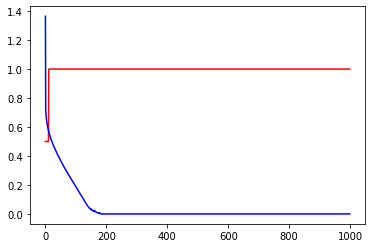

In [21]:
import matplotlib.pyplot as plt

print(history.history.keys()) # dict_keys(['loss', 'accuracy'])

plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['loss'], color='b')

plt.show()